In [ ]:
import yfinance as yf
import pandas as pd
import os

In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.6/3.6 MB 9.2 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 11.9 MB/s eta 0:00:00
     ---------------------------------------- 10.5/10.5 MB 8.9 MB/s eta 0:00:00
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
  Running setup.py install for multitasking: started
  Running setup.py install for multitasking: finished with status 'done'


You should consider upgrading via the 'C:\Users\kevin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import yfinance as yf
import pandas as pd
import os

In [4]:
import yfinance as yf
import pandas as pd
import os

In [5]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-06-08,4147.120117,4160.140137,4107.200195,4115.770020,3090180000,0,0
2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,3192330000,0,0
2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3936120000,0,0


In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB 2.8 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 KB 14.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\kevin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:xlabel='Date'>

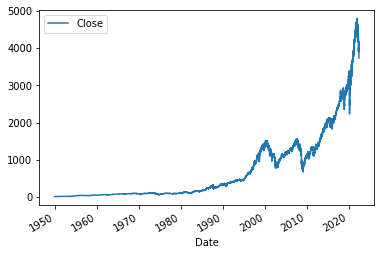

In [8]:
sp500.plot.line(y="Close", use_index=True)

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-06-08,4147.120117,4160.140137,4107.200195,4115.770020,3090180000,4017.820068,0
2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,3192330000,3900.860107,0
2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3936120000,3749.629883,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

In [12]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 8.8 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 6.3 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\kevin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4318181818181818

<AxesSubplot:xlabel='Date'>

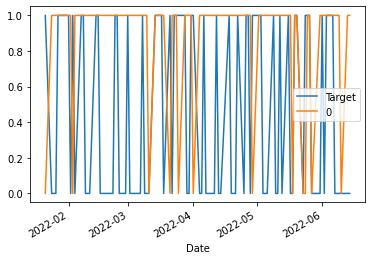

In [15]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined

In [28]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)


In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5348639455782312